In [491]:
print("OK")

OK


###### Data Link: https://www.kaggle.com/datasets/ra4u12/bookrecommendation

In [492]:
import pandas as pd
import numpy as np

In [493]:
books = pd.read_csv(r'F:\AI\MLOps\Book-Recommendation-Clustering-Pipeline\artifacts\dataset\ingested_data\BX-Books.csv', sep=";",on_bad_lines='skip', encoding='latin-1')

C:\Users\razyo\AppData\Local\Temp\ipykernel_5224\1118786789.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv(r'F:\AI\MLOps\Book-Recommendation-Clustering-Pipeline\artifacts\dataset\ingested_data\BX-Books.csv', sep=";",on_bad_lines='skip', encoding='latin-1')


In [494]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [495]:
books.iloc[10]['Image-URL-L']

'http://images.amazon.com/images/P/0771074670.01.LZZZZZZZ.jpg'

In [496]:
books.shape

(271360, 8)

In [497]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [498]:
books = books[['ISBN','Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher','Image-URL-L']]

In [499]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...


In [500]:
# Lets remane some wierd columns name
books.rename(columns={"Book-Title":'title',
                      'Book-Author':'author',
                     "Year-Of-Publication":'year',
                     "Publisher":"publisher",
                     "Image-URL-L":"image_url"},inplace=True)

In [501]:
books.head()

,ISBN,title,author,year,publisher,image_url
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...


In [502]:
# Selecting only ISBN and title for creating genres
books_isbn_title = books[['ISBN','title']]
books_isbn_title.head() 

,ISBN,title
0,0195153448,Classical Mythology
1,0002005018,Clara Callan
2,0060973129,Decision in Normandy
3,0374157065,Flu: The Story of the Great Influenza Pandemic...
4,0393045218,The Mummies of Urumchi


In [503]:
books_isbn_title.shape

(271360, 2)

In [504]:
#books_isbn_title.to_csv(r'F:\AI\MLOps\Book-Recommendation-Clustering-Pipeline\Experiment\books_isbn_title.csv', index=False)

In [505]:
# Now load the second dataframe (genres, that is created using TensorFlow in Colab)

genres = pd.read_csv(r'F:\AI\MLOps\Book-Recommendation-Clustering-Pipeline\Experiment\genres.csv', sep=",",on_bad_lines='skip', encoding='latin-1')

In [506]:
genres.head()

,ISBN,title,genre
0,0195153448,classical mythology,science fiction
1,0002005018,clara callan,children's books
2,0060973129,decision in normandy,adventure
3,0374157065,flu the story of the great influenza pandemic ...,romance
4,0393045218,the mummies of urumchi,children's books


In [507]:
genres = genres[['ISBN','genre']]

In [508]:
genres['ISBN'].value_counts().head(10)

ISBN
0195153448    1
0002005018    1
0060973129    1
0374157065    1
0393045218    1
0399135782    1
0425176428    1
0671870432    1
0679425608    1
074322678X    1
Name: count, dtype: int64

In [509]:
genres = genres.drop_duplicates(subset='ISBN')  # Keep first genre per ISBN

In [510]:
# Now join genres with books

books_with_genress = books.merge(genres, on='ISBN', how='left')
books_with_genress.head()

,ISBN,title,author,year,publisher,image_url,genre
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,science fiction
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,children's books
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,adventure
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,romance
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,children's books


In [511]:
books_with_genress.shape

(271360, 7)

In [512]:
books = books_with_genress
books.head()

,ISBN,title,author,year,publisher,image_url,genre
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,science fiction
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,children's books
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,adventure
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,romance
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,children's books


In [513]:
books['ISBN'].duplicated().sum()

np.int64(0)

In [514]:
# Now load the third dataframe (users)
users = pd.read_csv(r'F:\AI\MLOps\Book-Recommendation-Clustering-Pipeline\artifacts\dataset\ingested_data\BX-Users.csv', sep=";", on_bad_lines='skip', encoding='latin-1')

In [515]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [516]:
users.shape

(278858, 3)

In [517]:
# Lets remane some wierd columns name
users.rename(columns={"User-ID":'user_id',
                      'Location':'location',
                     "Age":'age'},inplace=True)

In [518]:
users.head()

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [519]:
# Now load the fourth dataframe (ratings)

ratings = pd.read_csv(r'F:\AI\MLOps\Book-Recommendation-Clustering-Pipeline\artifacts\dataset\ingested_data\BX-Book-Ratings.csv', sep=";", on_bad_lines='skip', encoding='latin-1')

In [520]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [521]:
ratings.shape

(1149780, 3)

In [522]:
# Lets remane some wierd columns name
ratings.rename(columns={"User-ID":'user_id',
                      'Book-Rating':'rating'},inplace=True)

In [523]:
ratings.head()

,user_id,ISBN,rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [524]:
print(books.shape, users.shape, ratings.shape, sep='\n')

(271360, 7)
(278858, 3)
(1149780, 3)


In [525]:
ratings['user_id'].value_counts()

user_id
11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
119573        1
276706        1
276697        1
276679        1
276676        1
Name: count, Length: 105283, dtype: int64

In [526]:
# Lets store users who had at least rated more than 150 books
x = ratings['user_id'].value_counts() > 200

In [527]:
x

user_id
11676      True
198711     True
153662     True
98391      True
35859      True
          ...  
119573    False
276706    False
276697    False
276679    False
276676    False
Name: count, Length: 105283, dtype: bool

In [528]:
x[x].shape

(899,)

In [529]:
# Selecting users who had at least rated more than 150 books
y= x[x].index

In [530]:
y

Index([ 11676, 198711, 153662,  98391,  35859, 212898, 278418,  76352, 110973,
       235105,
       ...
       116122,  44296,  28634,  59727,  73681, 274808, 188951,   9856, 155916,
       268622],
      dtype='int64', name='user_id', length=899)

In [531]:
ratings = ratings[ratings['user_id'].isin(y)]

In [532]:
ratings.head()

,user_id,ISBN,rating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0
1460,277427,0060002050,0


In [533]:
# Now join ratings with books

ratings_with_books = ratings.merge(books, on='ISBN') # default is inner join

In [534]:
#ratings_with_books.sort_values(['ISBN', 'user_id']).head()

In [535]:
#ratings_with_books = ratings_with_books.sort_values(['ISBN', 'user_id']).reset_index(drop=True)
ratings_with_books.head()

,user_id,ISBN,rating,title,author,year,publisher,image_url,genre
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,non-fiction
1,277427,0026217457,0,Vegetarian Times Complete Cookbook,Lucy Moll,1995,John Wiley &amp; Sons,http://images.amazon.com/images/P/0026217457.0...,children's books
2,277427,003008685X,8,Pioneers,James Fenimore Cooper,1974,Thomson Learning,http://images.amazon.com/images/P/003008685X.0...,self-improvement
3,277427,0030615321,0,"Ask for May, Settle for June (A Doonesbury book)",G. B. Trudeau,1982,Henry Holt &amp; Co,http://images.amazon.com/images/P/0030615321.0...,children's books
4,277427,0060002050,0,On a Wicked Dawn (Cynster Novels),Stephanie Laurens,2002,Avon Books,http://images.amazon.com/images/P/0060002050.0...,children's books


In [536]:
number_rating = ratings_with_books.groupby('title')['rating'].count().reset_index()

In [537]:
number_rating.head()

,title,rating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [538]:
number_rating.rename(columns={'rating':'num_of_rating'},inplace=True)

In [539]:
number_rating.head()

,title,num_of_rating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [540]:
final_rating = ratings_with_books.merge(number_rating, on='title')

In [541]:
final_rating.sample(30)

,user_id,ISBN,rating,title,author,year,publisher,image_url,genre,num_of_rating
29371,13082,0534558399,0,Critical Thinking,Richard L. Epstein,1998,Wadsworth Publishing Company,http://images.amazon.com/images/P/0534558399.0...,mystery,2
380872,222204,0553201875,10,Gosh! Wow!,Forrest Ackerman,1981,Bantam Books,http://images.amazon.com/images/P/0553201875.0...,fantasy,1
200352,114368,037379018X,0,"Driven Snowe (Blaze, 14)",Cathy Yardley,2001,Harlequin,http://images.amazon.com/images/P/037379018X.0...,horror,7
433154,242824,0671027077,0,Far Harbor,JoAnn Ross,2000,Pocket,http://images.amazon.com/images/P/0671027077.0...,romance,8
271821,157273,0553578626,0,A Wicked Way to Burn,Margaret Miles,1998,Bantam Books,http://images.amazon.com/images/P/0553578626.0...,horror,4
214588,125519,0671795988,0,"Stop the Insanity! Eat, Breathe, Move, Change ...",Susan Powter,1993,Simon &amp; Schuster,http://images.amazon.com/images/P/0671795988.0...,self-improvement,10
261878,153662,0140502076,0,Madeline's Rescue: Story and Pictures (Picture...,Ludwig Bemelmans,1977,Puffin Books,http://images.amazon.com/images/P/0140502076.0...,children's books,5
130486,76352,0449215482,0,The Silk Vendetta,Victoria Holt,1988,Ivy Books,http://images.amazon.com/images/P/0449215482.0...,fantasy,17
345003,198711,0843103914,0,Wee Sing and Play Book,Pamela Conn Beall,1987,Price Stern Sloan,http://images.amazon.com/images/P/0843103914.0...,children's books,3
294331,171118,1558285490,8,Unix in Plain English (In Plain English),Kevin Reichard,1997,John Wiley &amp; Sons,http://images.amazon.com/images/P/1558285490.0...,non-fiction,1


In [542]:
# Lets take those books which got at least 50 rating of user

final_rating = final_rating[final_rating['num_of_rating'] >= 50]

In [543]:
final_rating.sample(30)

,user_id,ISBN,rating,title,author,year,publisher,image_url,genre,num_of_rating
84778,43246,0375703861,0,White Teeth: A Novel,Zadie Smith,2001,Vintage Books USA,http://images.amazon.com/images/P/0375703861.0...,children's books,52
188287,108285,0425107469,0,Watchers,Dean R. Koontz,1996,Berkley Publishing Group,http://images.amazon.com/images/P/0425107469.0...,children's books,71
137778,78783,0671776800,0,Paradise,Judith McNaught,1992,Pocket,http://images.amazon.com/images/P/0671776800.0...,fantasy,73
35303,16795,0385335121,0,Tara Road,Maeve Binchy,1999,Bantam Doubleday Dell Pub (Trd),http://images.amazon.com/images/P/0385335121.0...,children's books,112
351087,203240,038000917X,9,Rebecca,Daphne du Maurier,1982,Avon Books,http://images.amazon.com/images/P/038000917X.0...,drama,68
33089,16106,0385503857,0,Oryx and Crake,Margaret Atwood,2003,Nan A. Talese,http://images.amazon.com/images/P/0385503857.0...,non-fiction,58
482405,271448,0425162443,0,The Rapture of Canaan,Sheri Reynolds,1997,Berkley Publishing Group,http://images.amazon.com/images/P/0425162443.0...,science fiction,87
390385,226545,0451204301,0,Impulse,Catherine Coulter,2001,Signet Book,http://images.amazon.com/images/P/0451204301.0...,self-improvement,50
434683,244688,0312278586,0,The Nanny Diaries: A Novel,Emma McLaughlin,2002,St. Martin's Press,http://images.amazon.com/images/P/0312278586.0...,children's books,230
51876,28204,034539657X,0,Dark Rivers of the Heart,Dean R. Koontz,1995,Ballantine Books,http://images.amazon.com/images/P/034539657X.0...,humor,58


In [544]:
books_unique = final_rating.drop_duplicates(subset=['title'])
print(books_unique.shape)
books_unique2 = final_rating.drop_duplicates(subset=['ISBN'])
print(books_unique2.shape)
books_unique3 = final_rating.drop_duplicates(subset=['ISBN', 'user_id'])
print(books_unique3.shape)
books_unique4 = final_rating.drop_duplicates(subset=['ISBN', 'title'])
print(books_unique4.shape)
books_unique5 = final_rating.drop_duplicates(subset=['ISBN', 'title', 'user_id'])
print(books_unique5.shape)



(742, 10)
(2249, 10)
(61853, 10)
(2249, 10)
(61853, 10)


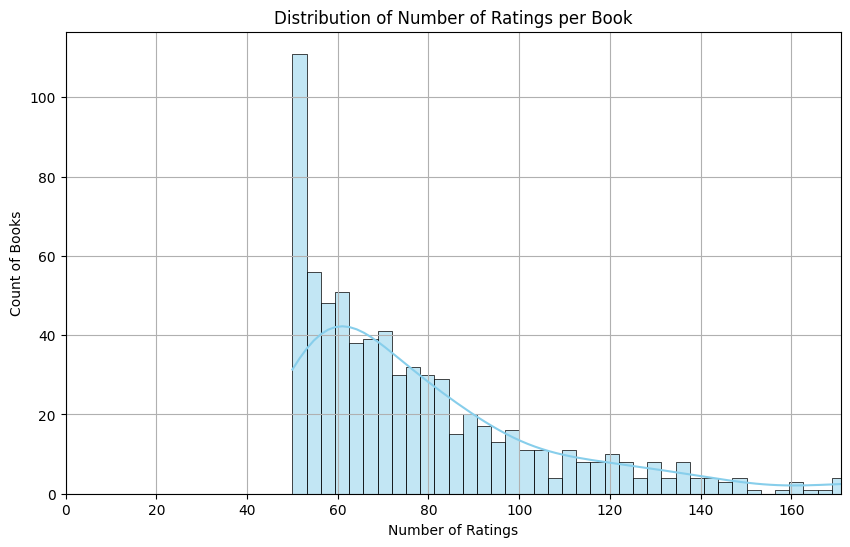

In [545]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(books_unique['num_of_rating'], bins=100, kde=True, color='skyblue')
plt.title('Distribution of Number of Ratings per Book')
plt.xlabel('Number of Ratings')
plt.ylabel('Count of Books')
plt.xlim(0, books_unique['num_of_rating'].quantile(0.95))  # to avoid long tail distortion
plt.grid(True)
plt.show()

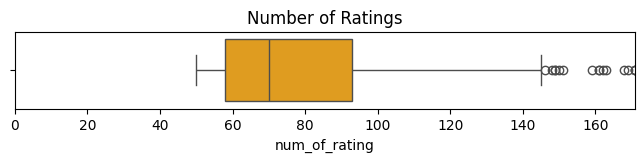

In [546]:
plt.figure(figsize=(8, 1))
sns.boxplot(data=books_unique, x='num_of_rating', color='orange')
plt.title('Number of Ratings')
plt.xlim(0, books_unique['num_of_rating'].quantile(0.95))
plt.show()

In [547]:
quantiles = books_unique['num_of_rating'].quantile([0.3, 0.5, 0.7, 0.9])
print(quantiles)

0.3     60.0
0.5     70.0
0.7     87.0
0.9    130.9
Name: num_of_rating, dtype: float64


Quantile values for num_of_rating:
0.3 quantile: 60.0
0.5 quantile: 70.0
0.7 quantile: 87.0
0.9 quantile: 130.89999999999998


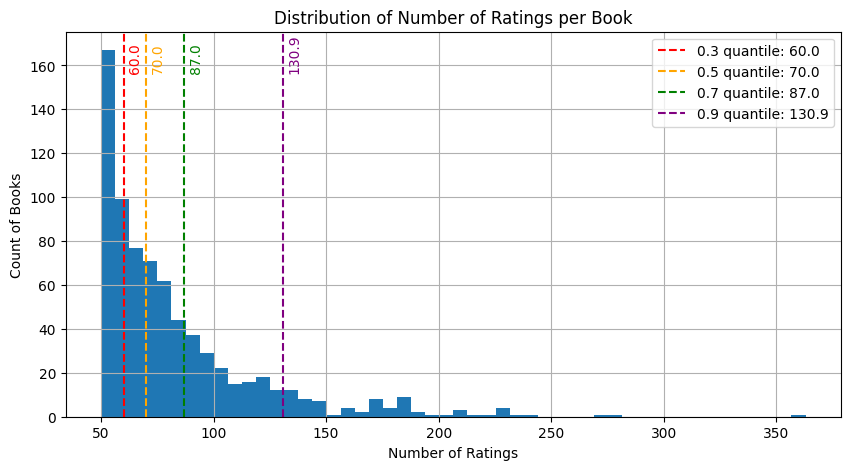

In [548]:
import matplotlib.pyplot as plt

quantiles = {
    '0.3': books_unique['num_of_rating'].quantile(0.3),
    '0.5': books_unique['num_of_rating'].quantile(0.5),
    '0.7': books_unique['num_of_rating'].quantile(0.7),
    '0.9': books_unique['num_of_rating'].quantile(0.9),
}

# Print quantile values
print("Quantile values for num_of_rating:")
for q, val in quantiles.items():
    print(f"{q} quantile: {val}")

plt.figure(figsize=(10, 5))
books_unique['num_of_rating'].hist(bins=50)

colors = ['red', 'orange', 'green', 'purple']

for (q, val), color in zip(quantiles.items(), colors):
    plt.axvline(val, color=color, linestyle='--', label=f'{q} quantile: {val:.1f}')
    # Add text annotation on the plot near the vertical line
    plt.text(val + 2, plt.ylim()[1]*0.9, f'{val:.1f}', color=color, rotation=90)

plt.title('Distribution of Number of Ratings per Book')
plt.xlabel('Number of Ratings')
plt.ylabel('Count of Books')
plt.legend()
plt.grid(True)
plt.show()


In [549]:
popular_books = final_rating[final_rating['num_of_rating'] >= 87]
print(f"Books kept: {popular_books['title'].nunique()} / Total: {final_rating['title'].nunique()}")

Books kept: 228 / Total: 742


In [550]:
popular_books = final_rating[final_rating['num_of_rating'] >= 70]
print(f"Books kept: {popular_books['title'].nunique()} / Total: {final_rating['title'].nunique()}")

Books kept: 384 / Total: 742


In [551]:
# Now lets calculate average rating for each book
final_rating['avg_rating'] = final_rating.groupby('ISBN')['rating'].transform('mean').round(2)

In [552]:
# Now let's apply IMDb weighted rating formula to calculate the average rating for each book

C = final_rating['avg_rating'].mean()
m = final_rating['num_of_rating'].quantile(0.5)

def weighted_rating(x, m=m, C=C):
    v = x['num_of_rating']
    R = x['avg_rating']
    return (v / (v + m)) * R + (m / (v + m)) * C


In [ ]:

final_rating['avg_rating'] = final_rating.apply(weighted_rating, axis=1).astype(int)


In [555]:
# Step 3: Drop duplicates on user-book level (if needed)
final_rating = final_rating.drop_duplicates(subset=["user_id", "ISBN"])

In [556]:
final_rating.describe()

,user_id,rating,num_of_rating,avg_rating
count,61853.000000,61853.000000,61853.000000,61853.00000
mean,140695.028584,2.006079,100.905227,1.46507
std,80781.462968,3.564843,51.919879,0.61157
min,254.000000,0.000000,50.000000,0.00000
25%,70052.000000,0.000000,63.000000,1.00000
50%,140358.000000,0.000000,83.000000,1.00000
75%,212923.000000,3.000000,121.000000,2.00000
max,278418.000000,10.000000,363.000000,7.00000


In [351]:
final_rating.sample(30)

,user_id,ISBN,rating,title,author,year,publisher,image_url,genre,num_of_rating,avg_rating
58717,31315,080411918X,0,A Patchwork Planet,ANNE TYLER,2001,Ballantine Books,http://images.amazon.com/images/P/080411918X.0...,science fiction,57,1
333864,194669,067942573X,0,Taltos: Lives of the Mayfair Witches,Anne Rice,1994,Alfred A. Knopf,http://images.amazon.com/images/P/067942573X.0...,children's books,53,2
300415,174304,034538475X,0,The Tale of the Body Thief (Vampire Chronicles...,Anne Rice,1993,Ballantine Books,http://images.amazon.com/images/P/034538475X.0...,horror,81,2
247826,143415,0425182878,0,Chosen Prey,John Sandford,2004,Berkley Publishing Group,http://images.amazon.com/images/P/0425182878.0...,fantasy,73,1
243603,141710,0060915544,0,The Bean Trees,Barbara Kingsolver,1989,Perennial,http://images.amazon.com/images/P/0060915544.0...,children's books,132,2
195956,112001,0375726403,9,Empire Falls,Richard Russo,2002,Vintage Books USA,http://images.amazon.com/images/P/0375726403.0...,romance,104,2
482377,271448,0375707972,6,The Reader,Bernhard Schlink,1999,Vintage Books USA,http://images.amazon.com/images/P/0375707972.0...,children's books,140,1
203750,115003,0452269571,8,Bastard Out of Carolina,Dorothy Allison,1993,Plume Books,http://images.amazon.com/images/P/0452269571.0...,horror,62,2
174324,100459,0375727345,8,House of Sand and Fog,Andre Dubus III,2000,Vintage Books,http://images.amazon.com/images/P/0375727345.0...,horror,174,1
379829,220278,0553279556,0,E Is for Evidence: A Kinsey Millhone Mystery (...,Sue Grafton,1989,Bantam,http://images.amazon.com/images/P/0553279556.0...,mystery,80,2


In [57]:
# lets drop the duplicates
final_rating.drop_duplicates(['user_id','title'],inplace=True)

In [58]:
final_rating.isnull().sum()

user_id          0
ISBN             0
rating           0
title            0
author           0
year             0
publisher        0
image_url        0
genre            0
num_of_rating    0
avg_rating       0
dtype: int64

In [59]:
# Lets create a pivot table with user_id as rows and title as columns, to get the rating of each book by each user
book_pivot = final_rating.pivot_table(columns='user_id', index='title', values= 'rating')

In [60]:
book_pivot

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84 Charing Cross Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [61]:
book_pivot.shape

(742, 888)

In [62]:
book_pivot.fillna(0, inplace=True)

In [63]:
book_pivot

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
from scipy.sparse import csr_matrix

In [65]:
book_sparse = csr_matrix(book_pivot)

In [66]:
book_sparse

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 14961 stored elements and shape (742, 888)>

In [67]:
type(book_sparse)

scipy.sparse._csr.csr_matrix

In [68]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(algorithm= 'brute')

In [69]:
model.fit(book_sparse)

,n_neighbors,5
,radius,1.0
,algorithm,'brute'
,leaf_size,30
,metric,'minkowski'
,p,2
,metric_params,None
,n_jobs,None


In [70]:
book_pivot.iloc[237,:]

user_id
254       9.0
2276      0.0
2766      0.0
2977      0.0
3363      0.0
         ... 
275970    9.0
277427    0.0
277478    0.0
277639    0.0
278418    0.0
Name: Harry Potter and the Chamber of Secrets (Book 2), Length: 888, dtype: float64

In [71]:
distance, suggestion = model.kneighbors(book_pivot.iloc[237,:].values.reshape(1,-1), n_neighbors=6 )

In [72]:
distance

array([[ 0.        , 67.75691847, 68.05145112, 72.277244  , 75.81556568,
        76.30203143]])

In [73]:
suggestion

array([[237, 238, 240, 241, 184, 536]])

In [74]:
for i in range(len(suggestion)):
    print(book_pivot.index[suggestion[i]])

Index(['Harry Potter and the Chamber of Secrets (Book 2)',
       'Harry Potter and the Goblet of Fire (Book 4)',
       'Harry Potter and the Prisoner of Azkaban (Book 3)',
       'Harry Potter and the Sorcerer's Stone (Book 1)', 'Exclusive',
       'The Cradle Will Fall'],
      dtype='object', name='title')


In [75]:
#keeping books name
book_names = book_pivot.index

In [76]:
book_names

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       '84 Charing Cross Road', 'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Cry In The Night',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='title', length=742)

In [77]:
book_names[4]

'84 Charing Cross Road'

In [78]:
final_rating.head()

,user_id,ISBN,rating,title,author,year,publisher,image_url,genre,num_of_rating,avg_rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,non-fiction,82,2
13,277427,0060930535,0,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999,Perennial,http://images.amazon.com/images/P/0060930535.0...,children's books,133,1
15,277427,0060934417,0,Bel Canto: A Novel,Ann Patchett,2002,Perennial,http://images.amazon.com/images/P/0060934417.0...,children's books,108,3
18,277427,0061009059,9,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995,HarperTorch,http://images.amazon.com/images/P/0061009059.0...,children's books,108,3
24,277427,006440188X,0,The Secret Garden,Frances Hodgson Burnett,1998,HarperTrophy,http://images.amazon.com/images/P/006440188X.0...,mystery,79,5


In [79]:
np.where(book_pivot.index == '4 Blondes')[0][0]

np.int64(3)

In [80]:
# final_rating['title'].value_counts()
ids = np.where(final_rating['title'] == "Harry Potter and the Chamber of Secrets (Book 2)")[0][0]

In [81]:
final_rating.iloc[ids]['image_url']

'http://images.amazon.com/images/P/0439064872.01.LZZZZZZZ.jpg'

In [82]:
book_name = []
for book_id in suggestion:
    book_name.append(book_pivot.index[book_id])

In [83]:
book_name

[Index(['Harry Potter and the Chamber of Secrets (Book 2)',
        'Harry Potter and the Goblet of Fire (Book 4)',
        'Harry Potter and the Prisoner of Azkaban (Book 3)',
        'Harry Potter and the Sorcerer's Stone (Book 1)', 'Exclusive',
        'The Cradle Will Fall'],
       dtype='object', name='title')]

In [84]:
ids_index = []
for name in book_name[0]: 
    ids = np.where(final_rating['title'] == name)[0][0]
    ids_index.append(ids)

In [85]:
ids_index

[np.int64(44),
 np.int64(321),
 np.int64(45),
 np.int64(46),
 np.int64(786),
 np.int64(2297)]

In [86]:
for idx in ids_index:
    url = final_rating.iloc[idx]['image_url']
    print(url)

http://images.amazon.com/images/P/0439064872.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0439139597.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0439136369.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/043936213X.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0446604232.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0440115450.01.LZZZZZZZ.jpg


In [87]:
# import pickle
# pickle.dump(model,open('artifacts/model.pkl','wb'))
# pickle.dump(book_names,open('artifacts/book_names.pkl','wb'))
# pickle.dump(final_rating,open('artifacts/final_rating.pkl','wb'))
# pickle.dump(book_pivot,open('artifacts/book_pivot.pkl','wb'))

In [88]:
book_names

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       '84 Charing Cross Road', 'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Cry In The Night',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='title', length=742)

# Testing model

In [89]:
def recommend_book(book_name):
    book_id = np.where(book_pivot.index == book_name)[0][0]
    distance, suggestion = model.kneighbors(book_pivot.iloc[book_id,:].values.reshape(1,-1), n_neighbors=6 )
    
    for i in range(len(suggestion)):
            books = book_pivot.index[suggestion[i]]
            for j in books:
                if j == book_name:
                    print(f"You searched '{book_name}'\n")
                    print("The suggestion books are: \n")
                else:
                    print(j)

In [90]:
book_name = "2nd Chance"
recommend_book(book_name)

You searched '2nd Chance'

The suggestion books are: 

The Next Accident
The Ghost
Exclusive
Last Man Standing
Unspeakable
